
# Week 6 Regression
Proprietary material - Under Creative Commons 4.0 licence CC-BY-NC https://creativecommons.org/licenses/by-nc/4.0/legalcode

# Machine Learning (Again)

Last week we talked some introduction to some basic machine learning concepts. Before we start this session lets introduce some more. 


## Models

What is a model? 

We have used the word model before on the material, but what do we mean by it? 

Let's go over some quick definition. 

A model is a function that maps input features to a target value. In this material, we define a model based on its weights/parameters that scale different input dimensions.

As an equation a model is defined by:

$$
f(X) = y
$$

$$
y \approx t
$$

Where:

- t is our measured real world value
- y is the prediction
- X is the feature vector that corresponds to t

In machine learning, we use training data (data we have) to ‘teach’ a model to make predictions on new data. Training is sometimes also called fitting. Because we are fitting the model to our training data.

The parameters (or weights) are the variables of our model that are learned during training.


# Regression 

As we said last week, regression it's a type of supervised learning. This means that we have a set of observations and a corresponding value that we need to predict. But instead of a class, the label is a variable that correlates to the rest of the observations. This can 

Regression it's an essential tool in several industries. It's applications go from finance, medicine, marketing, science, engineering, investing, farming, logistics and many more. Basically, any discipline that need to trace a line over some points need some type of regression method. 

Before continuing, lets see a simple example of regression:


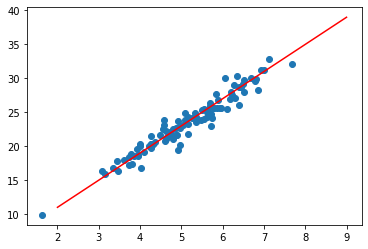

In [2]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

X = np.random.normal(size=100, loc=5)
y = X*4 + 3 + np.random.normal(size=100)

# let's manually adjust a line over the data
k = np.linspace(2, 9, 100)
pred = k*4 + 3

plt.scatter(X,y)
plt.plot(k, pred, 'r')


That is a hand picked solution, but we will go over how to apply machine learning to harder problems.

There are two main types of regression models: linear and non linear. 

## Linear models 

Linear models are regression models that use a linear function to predict over it's observations. 

In case you don't know, a linear function it's any function that satisfies the properties of additivity and homogeneity. As an equation it would be: 

- Additivity: $\quad f(a+b) = f(a) + f(b)$
- Homogeneity: $\quad f(ab) = af(b) \quad \forall a$

In simpler words, any function that can be represented by a straight line (or hyperplane) like in the previous example or the following figure.

<img src="2dlinear.jpg">

The equation for a 2d linear model is: 

$$
f(x) = m*x + b
$$

Where m is referred as the slope and b as the y-intercept. 

This can be generalized to n dimensions by using a matrix as m and a vector as b.  

## Non Linear models

Non linear models are models that use a non linear function to predict over it's observations. 

A non linear function is any function that is not linear.

Basically, any function that can't be represented as a straight line. ej: trigonometric, polynomials with grade greater or equal to 2, sigmoid, exponential, the combination of this functions, etc. 

<img src="nonlinear.png">

Before jumping on the next subject, lets see a quick example. 

Let's say that we have the following card data:

In [3]:
import pandas as pd 

data = pd.read_csv('/home/jose/Desktop/AICE Colaboration/AICE-CourseMaterial/Labs/Week 6 Regression models/auto-mpg.csv')

data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df = data[['mpg', 'weight']]

df

,mpg,weight
0,18.0,3504
1,15.0,3693
2,18.0,3436
3,16.0,3433
4,17.0,3449
...,...,...
393,27.0,2790
394,44.0,2130
395,32.0,2295
396,28.0,2625


<AxesSubplot:xlabel='weight', ylabel='mpg'>

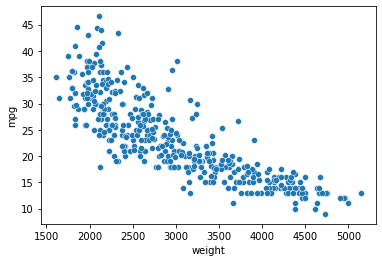

In [5]:
import seaborn as sns 

sns.scatterplot(data=df, x='weight', y='mpg')

Now, we want to train a model that takes the weight of the car and predicts the fuel efficiency. 

Let's assume the relationship between this variables is linear, so we can fit a linear model. 

Now, our objective is to find the best m and b in our line equation that fits our data. But how do we do that? 

Is this line a good fit? 

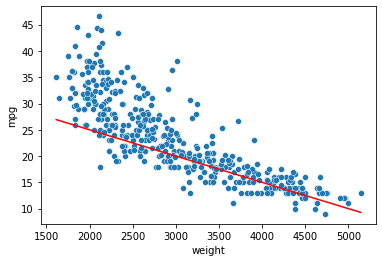

In [6]:
x = np.linspace(df['weight'].min(), df['weight'].max(), 200)
y = -(5/1000)*x + 35
sns.scatterplot(data=df, x='weight', y='mpg')
plt.plot(x,y,'r')

Or is this one better? 

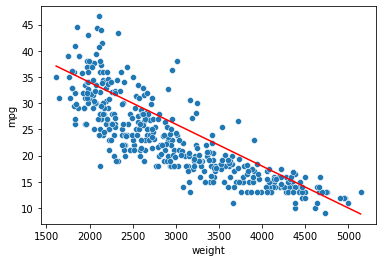

In [7]:
x = np.linspace(df['weight'].min(), df['weight'].max(), 200)
y = -(8/1000)*x + 50
sns.scatterplot(data=df, x='weight', y='mpg')
plt.plot(x,y,'r')

We need a way to objectively compare our models and measure how right or wrong our prediction fits the data. This is were we need loss functions.

# Loss Functions

Let's give a quick definition for a loss function.

A loss function is any function that takes as input the ground truth ($y$) and our model's prediction ($\hat{y}$) and returns a value that correlates on how wrong our model's prediction is → smaller loss values implies more correct.

It's very important to know that there is not one 'best/correct' loss function. Just like in model selection, you need to choose a loss based on the problem at hand.

We will cover new losses when they become relevant, but for now let's just define some common regression losses. 

### Mean Absolute Error (MAE) | L1 Loss

The MAE loss is the sum of all absolute differences between prediction and observation. It's robust to outliers but it's a hard function to optimize so it's not often used. 

$$
MAE = \frac{1}{n}\sum^n_{i=1} |y_i - \hat{y}_i|
$$


### Mean Square Error (MSE) | L2 Loss

The MSE it's a very common loss that is used for most problems. The square gives more importance to the predictions that are far away than those that are closer. Due to it's curvature in the gradient space it's very easy to optimize.

$$
MSE = \frac{1}{n}\sum^n_{i=1} (y_i - \hat{y}_i)^2
$$

Now we have a function that can tell us how our models perform, let's evaluate our previous models. 

In [8]:
from sklearn.metrics import mean_squared_error as mse

pred = -(5/1000)*df.weight.values + 35

mse(df.weight.values, pred)

9426643.282858353

In [9]:
pred = -(8/1000)*df.weight.values + 50

mse(df.weight.values, pred)

9395073.43420784

We can see that our second model has a lower loss than the first one, so it adjust the data better. Still, there could be a better solution than the one we found, so how do we get it?

# Gradient Descent



Gradient descent is an iterative method for finding an optimum set of parameters relative to a model, loss function, and training dataset. Gradient descent uses the gradient of given cost function (average of loss) to minimize it over the training set.

$$
m_{i+1} = m_i - \alpha \nabla_m L(m_i, b_i)
$$

$$
b_{i+1} = b_i - \alpha \nabla_b L(m_i, b_i)
$$

Where m and b are the parameters of our model, L our loss function and $\alpha$ the learning rate.

Let's suppose we plot our loss function for our linear regression in the m|b space.


<img src="grad_dec1.png">


If we see it from the top we would have something like this

<img src="grad_dec2.png">

But just fixing by the gradient can make the training unstable, so we ponder it by a learning rate $\alpha > 0$. But we still need tto be careful or something like on the next figure could happen.

<img src="grad_dec3.png">

Now let's go back to our data, at this point we could make a handmade program that solves the gradient decent for our data. But instead lets use a sklearn implementation.

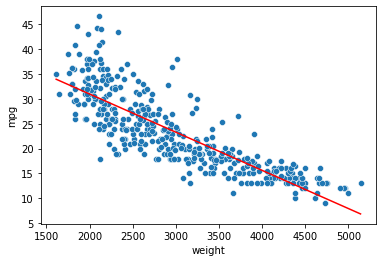

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

X = df.weight.values.reshape(-1, 1)
y = df.mpg.values

regr = linear_model.LinearRegression()
regr.fit(X, y)

x = np.linspace(df['weight'].min(), df['weight'].max(), 200).reshape(-1, 1)
pred = regr.predict(x)


sns.scatterplot(data=df, x='weight', y='mpg')
plt.plot(x,pred,'r')

The concept stays overall the same for nonlinear functions, but for those cases the gradient of the Loss function can get very complicated, making finding an acceptable solution difficult. 

There are many non linear models with different strenghts and weaknesses. For this session I wont cover any of them in detail, but I'll leave you with a quick example of a sklearn model applied to our data and next week we will go over neural networks that fall on that category.



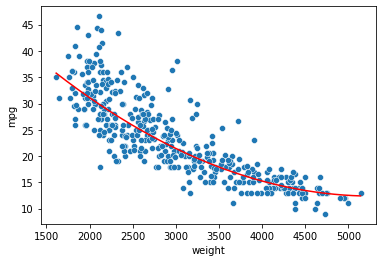

In [12]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X = df.weight.values.reshape(-1, 1)
y = df.mpg.values


#regr = SVR(kernel="poly", C=100, gamma="auto", degree=2, epsilon=0.1, coef0=1)
#regr.fit(X, y)

regr = make_pipeline(StandardScaler(), SVR(kernel="poly", C=100, gamma="auto", degree=2, epsilon=0.1, coef0=1))
regr.fit(X, y)

x = np.linspace(df['weight'].min(), df['weight'].max(), 200).reshape(-1, 1)
pred = regr.predict(x)


sns.scatterplot(data=df, x='weight', y='mpg')
plt.plot(x,pred,'r')

# Applying Linear Regression to a toy dataset

In this section we'll take a look at a dataset that we saw last time: The IRIS dataset. Recall that this is a labelled dataset that has 4 features for each datapoint. It stores the sepal length in cm for a flower, the sepal width in cm, the petal length in cm, and the petal width in cm. It also has a label telling us which flower this data point is for. There are 3 possible classes (i.e. types of flowers) represented in this data set: Iris Setosa, Iris Versiclolour, and Iris Virgnica. There are 150 samples (datapoints) in this dataset. Lets import the dataset. 

In [ ]:
# Import Dataset from sklearn
from sklearn.datasets import load_iris
import pandas as pd
# Load Iris Data
iris = load_iris()


In [ ]:
# Creating pd DataFrames
iris_df = pd.DataFrame(data= iris.data, columns= iris.feature_names)
target_df = pd.DataFrame(data= iris.target, columns= ['species'])
# this is a quick way to convert the labels into something more readable
def converter(specie):
    if specie == 0:
        return 'setosa'
    elif specie == 1:
        return 'versicolor'
    else:
        return 'virginica'
target_df['species'] = target_df['species'].apply(converter)
# Concatenate the DataFrames
iris_df = pd.concat([iris_df, target_df], axis= 1)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


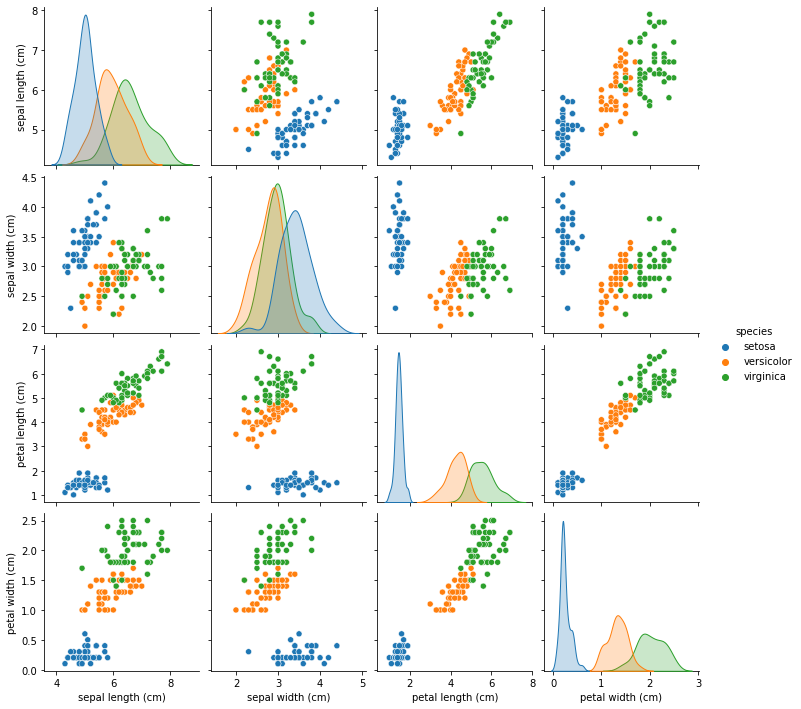

In [ ]:
import seaborn as sns

# this is another data visualization tool we can use for our datasets in the
# future!
sns.pairplot(iris_df, hue= 'species')


Linear regression is one of the most basic machine learning teachniques you will use. We are learning it because it provides a good foundation for you to build off of. Starting off, we will use a linear approach to modelling the relationship between a scalar response (y — dependent variables) and one or more explanatory variables (X — independent variables).

From this toy dataset we'll be predicting sepal length using linear regression.



In [ ]:
from sklearn.model_selection import train_test_split

# Re-converting the species label into numerical values
iris_df.drop('species', axis= 1, inplace= True)
target_df = pd.DataFrame(columns= ['species'], data= iris.target)
iris_df = pd.concat([iris_df, target_df], axis= 1)

# Separating out the data we want to predict
X= iris_df.drop(labels= 'sepal length (cm)', axis= 1)
y= iris_df['sepal length (cm)']

# TODO:
# Split the Dataset 
X_train, X_test, y_train, y_test = 


SyntaxError: ignored

In [ ]:
#@title Solution (Double Click To See):

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 1)


In [ ]:
from sklearn.linear_model import LinearRegression
# Instantiating LinearRegression() Model
lr = LinearRegression()


# Training/Fitting the Model
lr.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Making Predictions
lr.predict(X_test)
pred = lr.predict(X_test)

# Evaluating Model's Performance
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

Let's see our model in action!

In [ ]:
iris_df.loc[9]

In [ ]:
# Let's convert this information into a dataframe and run it through our model
d = {'sepal length (cm)' : [4.9],
    'sepal width (cm)' : [3.1],
    'petal length (cm)' : [1.5],
    'petal width (cm)' : [0.1],
    'species' : 0}
test_df = pd.DataFrame(data= d)
test_df

In [ ]:
pred = lr.predict(X_test)
print('Predicted Sepal Length (cm):', pred[0])
print('Actual Sepal Length (cm):', 4.9)

# References

https://seaborn.pydata.org/generated/seaborn.countplot.html

https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8

https://medium.com/analytics-vidhya/linear-regression-using-iris-dataset-hello-world-of-machine-learning-b0feecac9cc1


